In [39]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np

In [41]:
key = '24d1fa8f1e68bedf4ca5a9d02fd58834bbc25ac3'
print(key)

24d1fa8f1e68bedf4ca5a9d02fd58834bbc25ac3


In [43]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

In [45]:
df.to_csv('AAPL.csv')

In [47]:
df = pd.read_csv('AAPL.csv')

In [49]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2016-05-12 00:00:00+00:00,90.34,92.78,89.47,92.72,76314690,21.095605,21.665378,20.892448,21.651367,305258760,0.0,1.0
1,1,AAPL,2016-05-13 00:00:00+00:00,90.52,91.67,90.00,90.00,44392765,21.137637,21.406178,21.016210,21.016210,177571060,0.0,1.0
2,2,AAPL,2016-05-16 00:00:00+00:00,93.88,94.39,91.65,92.39,61259756,21.922242,22.041334,21.401507,21.574307,245039024,0.0,1.0
3,3,AAPL,2016-05-17 00:00:00+00:00,93.49,94.70,93.01,94.55,46916939,21.831172,22.113724,21.719086,22.078696,187667756,0.0,1.0
4,4,AAPL,2016-05-18 00:00:00+00:00,94.56,95.21,93.89,94.16,42062391,22.081032,22.232815,21.924578,21.987626,168249564,0.0,1.0


In [51]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,1252,AAPL,2021-05-04 00:00:00+00:00,127.85,131.4899,126.700,131.19,137564718,127.634352,131.268112,126.486291,130.968718,137564718,0.00,1.0
1253,1253,AAPL,2021-05-05 00:00:00+00:00,128.10,130.4500,127.970,129.20,84000900,127.883930,130.229966,127.754149,128.982075,84000900,0.00,1.0
1254,1254,AAPL,2021-05-06 00:00:00+00:00,129.74,129.7500,127.130,127.89,78128334,129.521164,129.531147,126.915566,127.674284,78128334,0.00,1.0
1255,1255,AAPL,2021-05-07 00:00:00+00:00,130.21,131.2582,129.475,130.85,78973273,130.210000,131.258200,129.475000,130.850000,78973273,0.22,1.0
1256,1256,AAPL,2021-05-10 00:00:00+00:00,126.85,129.5400,126.810,129.41,88071229,126.850000,129.540000,126.810000,129.410000,88071229,0.00,1.0


In [53]:
df.count()

Unnamed: 0     1257
symbol         1257
date           1257
close          1257
high           1257
low            1257
open           1257
volume         1257
adjClose       1257
adjHigh        1257
adjLow         1257
adjOpen        1257
adjVolume      1257
divCash        1257
splitFactor    1257
dtype: int64

In [55]:
df1 = df.reset_index()['close']

In [57]:
df1

0        90.34
1        90.52
2        93.88
3        93.49
4        94.56
         ...  
1252    127.85
1253    128.10
1254    129.74
1255    130.21
1256    126.85
Name: close, Length: 1257, dtype: float64

In [59]:
import matplotlib.pyplot as plt

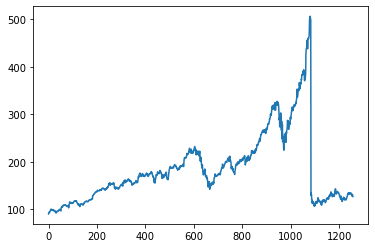

In [61]:
plt.plot(df1)

In [63]:
df1.shape

(1257, 1)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [67]:
df1.shape

(1257, 1)

In [69]:
df1

array([[0.        ],
       [0.00043295],
       [0.00851473],
       ...,
       [0.09476849],
       [0.09589898],
       [0.0878172 ]])

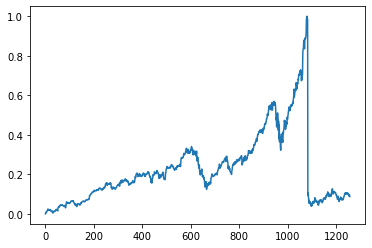

In [71]:
plt.plot(df1)

In [73]:
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_df, test_df = df1[0:train_size, :], df1[train_size : len(df1), : 1]

In [75]:
print(train_size, test_size)

817 440


In [77]:
def create_dataset(dataset, timestamp=1):
    dataX, datay = [], []
    for i in range(len(dataset)-timestamp-1):
        a = dataset[i:(i+timestamp),0]
        dataX.append(a)
        datay.append(dataset[i+timestamp, 0])
    return np.array(dataX), np.array(datay)

In [79]:
timestamp = 100
X_train, y_train = create_dataset(train_df, timestamp)
X_test, y_test = create_dataset(test_df, timestamp)

In [81]:
X_train, y_train

(array([[0.        , 0.00043295, 0.00851473, ..., 0.05253157, 0.05462417,
         0.05334937],
        [0.00043295, 0.00851473, 0.00757667, ..., 0.05462417, 0.05334937,
         0.05450391],
        [0.00851473, 0.00757667, 0.01015033, ..., 0.05334937, 0.05450391,
         0.05462417],
        ...,
        [0.22463019, 0.23037883, 0.23494889, ..., 0.28404089, 0.27343355,
         0.24774504],
        [0.23037883, 0.23494889, 0.231365  , ..., 0.27343355, 0.24774504,
         0.25654841],
        [0.23494889, 0.231365  , 0.23528563, ..., 0.24774504, 0.25654841,
         0.2614552 ]]),
 array([0.05450391, 0.05462417, 0.05664462, 0.05705352, 0.06184005,
        0.06244137, 0.06494287, 0.06407697, 0.06564041, 0.06544799,
        0.06525556, 0.06441371, 0.06426939, 0.06316296, 0.06568851,
        0.06713169, 0.06073361, 0.05806374, 0.05623572, 0.05580277,
        0.05087192, 0.05111245, 0.04687913, 0.0444979 , 0.0482742 ,
        0.04983764, 0.04940469, 0.04197234, 0.04351173, 0.03696933,
 

In [83]:
print(X_train.shape, y_train.shape)

(716, 100) (716,)


In [85]:
print(X_test.shape, y_test.shape)

(339, 100, 1) (339,)


In [87]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [91]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [93]:
np.__version__

'1.19.5'

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 91,101
Trainable params: 91,101
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 2s 129ms/step - loss: 8.5351e-05 - val_loss: 0.0050
Epoch 2/100
12/12 [==============================] - 2s 128ms/step - loss: 8.9709e-05 - val_loss: 0.0049
Epoch 3/100
12/12 [==============================] - 2s 127ms/step - loss: 8.7618e-05 - val_loss: 0.0050
Epoch 4/100
12/12 [==============================] - 2s 128ms/step - loss: 9.6279e-05 - val_loss: 0.0047
Epoch 5/100
12/12 [==============================] - 2s 134ms/step - loss: 9.1581e-05 - val_loss: 0.0046
Epoch 6/100
12/12 [==============================] - 2s 146ms/step - loss: 8.5002e-05 - val_loss: 0.0048
Epoch 7/100
12/12 [==============================] - 2s 127ms/step - loss: 7.9187e-05 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 2s 126ms/step - loss: 7.8992e-05 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 2s 126ms/step - loss: 8.9412e-05 - val_loss: 0.0044
Epoch 10/100
12/12 [==============================] - 2

12/12 [==============================] - 2s 135ms/step - loss: 5.5475e-05 - val_loss: 0.0030
Epoch 79/100
12/12 [==============================] - 2s 134ms/step - loss: 5.8143e-05 - val_loss: 0.0033
Epoch 80/100
12/12 [==============================] - 2s 128ms/step - loss: 7.0056e-05 - val_loss: 0.0030
Epoch 81/100
12/12 [==============================] - 2s 126ms/step - loss: 5.2984e-05 - val_loss: 0.0032
Epoch 82/100
12/12 [==============================] - 1s 125ms/step - loss: 6.1083e-05 - val_loss: 0.0029
Epoch 83/100
12/12 [==============================] - 2s 126ms/step - loss: 5.2284e-05 - val_loss: 0.0031
Epoch 84/100
12/12 [==============================] - 2s 128ms/step - loss: 5.4664e-05 - val_loss: 0.0029
Epoch 85/100
12/12 [==============================] - 2s 129ms/step - loss: 5.0008e-05 - val_loss: 0.0032
Epoch 86/100
12/12 [==============================] - 2s 126ms/step - loss: 5.6687e-05 - val_loss: 0.0029
Epoch 87/100
12/12 [==============================] - 2s 12

In [99]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [101]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [103]:
import math
from sklearn.metrics import mean_squared_error

In [105]:
math.sqrt(mean_squared_error(y_train, train_pred))

0.006776903723698798

In [107]:
math.sqrt(mean_squared_error(y_test, test_pred))

0.054268591022716084

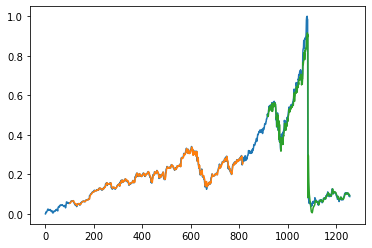

In [108]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df1)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()